In [15]:
import maboss
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np
import pandas as pd

In [16]:
from datetime import datetime
e = datetime.today().strftime('%Y-%m-%d')
str(e)

'2021-03-12'

In [17]:
file = 'ICD_newDC_newICI'

In [18]:
bnd = file+'.bnd'
cfg = file+'.cfg'
upp = file+'.upp'

In [19]:
sns.set_style("white")
colormap_scale = sns.light_palette("black", as_cmap=True)
colormap_ratios = sns.diverging_palette(240, 0, center='light', as_cmap=True)
def save_figure(figure, title):
    figure.savefig("%s.pdf" % title, bbox_inches="tight")

In [20]:
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [21]:
sim = maboss.load(bnd,cfg)
big_sim = maboss.UpdatePopulation(sim,upp)
start = time.time()
res = big_sim.run()
nodes=('Tumor','ChemoT','anti_CTLA4','anti_PD1','DyingTumor','cDC1','cDC2','moDC','pDC','CD4','CD8','a_cDC1','a_cDC2','CD4_Act','P2Y2R','P2X7R','FPR1','LRP1','TLR4','IFN1R','IL1BR','IL2R','IL4R','IL6R','IL10R','IL12R','IL27R','IFNgR','IL17R','TGFbR','CXCR3','CD28','CTLA4','PD1','TNFRs','TCR_I','TCR_II','CD226','Proliferation_Survival','PRDM1','MAF','STAT4','NFkB','MAPKs','Ca_NFAT','PI3K_AKT','Tbet','FOXP3','FOXO1','LAT_complex','VAV','PLCG','PKC_teta','TIM3','TIGIT','ICOS','TRAFs','CK2','PTEN','PP2A','SHIP','SHP','LAG3','AP1','YY1','NFAT','LCK_FYN','STAT1','SMAD2_3','SMAD7','STAT3','NFIL3','GRB2','GSK3','Th1','Th2','Th17','Treg','CALR','ATP','ANXA1','HMGB1','CXCL10','LAG3_L','TIM3_L','TIGIT_L','PD_L1','TNFRs_L','ICOS_L','CD80','MHC_I','MHC_II','IL1B','IL2','IL4','IL6','IL10','IL12','IL17','IL27','IFNg','TGFb','Perforin','preCTL','CTL','IFN1','Division','Death')
table = res.get_nodes_stepwise_probability_distribution(nodes)
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")
%notify -m "The simulation is over."


exec. time:  317.81501723130543  mins


<IPython.core.display.Javascript object>

In [22]:
table.to_csv('temporary.csv')

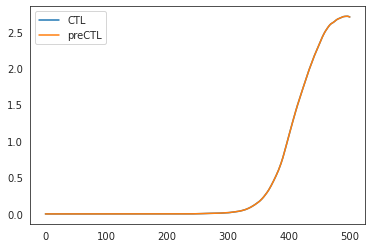

In [23]:
plt.figure()
#plt.plot(table['PopRatio']*table['IL2'],label='IL2')
#plt.plot(table['PopRatio']*table['IL2R'],label='IL2R')
#plt.plot(table['PopRatio']*table['NFkB'],label='NFkB')
#plt.plot(table['PopRatio']*table['AP1'],label='AP1')
#plt.plot(table['PopRatio']*table['NFAT'],label='NFAT')
#plt.plot(table['PopRatio']*table['CD4'],label='CD4')
#plt.plot(table['PopRatio']*table['CD28'],label='CD28')
#plt.plot(table['PopRatio']*table['TCR_II'],label='TCR_II')
#plt.plot(table['PopRatio']*table['CD4_Act'],label='CD4_Act')
#plt.plot(table['PopRatio']*table['IFNg'],label='IFNg')
#plt.plot(table['PopRatio']*table['Proliferation_Survival'],label='prol')
plt.plot(table['PopRatio']*table['CTL'],label='CTL')
plt.plot(table['PopRatio']*table['preCTL'],label='preCTL')

plt.legend()

In [24]:
plt.ioff()
All = plt.figure()
plt.plot(table['PopRatio']*table['CTL'],label="CTL")
plt.plot(table['PopRatio']*table['CALR'],label="CALR")
plt.plot(table['PopRatio']*table['HMGB1'],label="HMGB1")
plt.plot(table['PopRatio']*table['Treg'],label="Treg")
plt.plot(table['PopRatio']*table['Tumor'],label="Tumor")
plt.plot(table['PopRatio']*table['Perforin'],label="Perforin")
plt.plot(table['PopRatio']*table['CTLA4'],label="CTLA4")
plt.plot(table['PopRatio']*table['PD1'],label="PD1")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(All,"ALL_ICD"+str(e))
plt.close(All)
DCs = plt.figure()
plt.plot(table['PopRatio']*table['moDC'],label="moDC")
plt.plot(table['PopRatio']*table['pDC'],label="pDC")            
plt.plot(table['PopRatio']*table['cDC1'],label="cDC1")
plt.plot(table['PopRatio']*table['cDC2'],label="cDC2")            
plt.plot(table['PopRatio']*table['a_cDC1'],label="a_cDC1")
plt.plot(table['PopRatio']*table['a_cDC2'],label="a_cDC2")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(DCs,"DCs_ICD"+str(e))            
plt.close(DCs)            
NTcells = plt.figure()
plt.plot(table['PopRatio']*table['Treg'],label="Treg")
plt.plot(table['PopRatio']*table['Th1'],label="Th1")
plt.plot(table['PopRatio']*table['Th2'],label="Th2")
plt.plot(table['PopRatio']*table['Th17'],label="Th17")
plt.plot(table['PopRatio']*table['preCTL'],label="preCTL")
plt.plot(table['PopRatio']*table['CTL'],label="CTL")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(NTcells,"Tcells_ICD"+str(e))
plt.close(NTcells)
Ligands = plt.figure()


<Figure size 432x288 with 0 Axes>

In [ ]:
values = np.linspace(0.1,1.0,10)
values

In [ ]:
plt.ioff()
for l in values:
    sim = maboss.load(bnd,cfg)
    sim.network.set_istate("Anti_CTLA4",[l,1-l])
    sim.network.set_istate("Anti_PD1",[1-l,l])
    big_sim = maboss.UpdatePopulation(sim,upp)
    start = time.time()
    res = big_sim.run()
    nodes=('Tumor','DC','aDC','cd4','cd8','Th1','Th2','Th17','Treg','preCTL','CTL','CALR_o','HMGB1_o','Perforin_o','IL10_o','IL27_o','CD28','CTLA4','PD1','PD1_L','Anti_PD1_L','Anti_CTLA4')
    table = res.get_nodes_stepwise_probability_distribution(nodes)
    Tcells = plt.figure()
    plt.plot(table['PopRatio']*table['Th1'],label="Th1")
    plt.plot(table['PopRatio']*table['Th2'],label="Th2")
    plt.plot(table['PopRatio']*table['Th17'],label="Th17")
    plt.plot(table['PopRatio']*table['CTL'],label="CTL")
    plt.plot(table['PopRatio']*table['Treg'],label="Treg")
    plt.plot(table['PopRatio']*table['IL10_o'],label="IL10")
    plt.plot(table['PopRatio']*table['IL27_o'],label="IL27")
    plt.plot(table['PopRatio']*table['CTLA4'],label="CTLA4")
    plt.plot(table['PopRatio']*table['PD1'],label="PD1")
    plt.plot(table['PopRatio']*table['Tumor'],label="Tumor")
    plt.plot(table['PopRatio']*table['Perforin_o'],label="Perforin_o")
    plt.ylabel("Rel.size")
    plt.xlabel("Time")
    plt.legend()
    save_figure(Tcells,"ALL_AntiPD1_"+str(1-l)+"AntiCTLA4_"+str(l))
    plt.close(Tcells)
    checkpoint_cd28 = plt.figure()
    plt.plot(table['PopRatio']*table['CTLA4'],label="CTLA4")
    plt.plot(table['PopRatio']*table['PD1'],label="PD1")
    plt.plot(table['PopRatio']*table['CD28'],label="cd28")
    plt.legend()
    save_figure(checkpoint_cd28,"CD28_AntiPD1_"+str(1-l)+"AntiCTLA4_"+str(l))
    plt.close(checkpoint_cd28)
    NTcells = plt.figure()
    plt.plot(table['PopRatio']*table['Treg'],label="Treg")
    plt.plot(table['PopRatio']*table['Th1'],label="Th1")
    plt.plot(table['PopRatio']*table['Th2'],label="Th2")
    plt.plot(table['PopRatio']*table['preCTL'],label="preCTL")
    plt.plot(table['PopRatio']*table['CTL'],label="CTL")
    #plt.plot(table['PopRatio']*table['Tumor'],label="Tumor")
    plt.plot(table['PopRatio']*table['Perforin_o'],label="Perforin_o")
    plt.ylabel("Rel.size")
    plt.xlabel("Time")
    plt.legend()
    save_figure(NTcells,"Tcells_AntiPD1_"+str(1-l)+"AntiCTLA4"+str(l))
    plt.close(NTcells)
    stop = time.time()
    duration = (stop-start)/60
    print("exec. time: ",duration," mins")

In [ ]:
adc = plt.figure()
plt.plot(table['PopRatio']*table['Tumor'],'-g',label="Tumor")
plt.plot(table['PopRatio']*table['CALR_o'],'-',label="CALR_o")
plt.plot(table['PopRatio']*table['aDC'],'-r',label="aDC")
plt.ylabel("Rel.size")
plt.xlabel(r'$Time')
plt.legend()
#save_figure(adc,"aDC_Tumor_CALR")

In [ ]:
bnd_d = 'ICD_ExtendDy.bnd'
cfg_d = 'ICD_ExtendDy.cfg'
upp_d = 'ICD_ExtendDy.upp'

In [ ]:
sim_d = maboss.load(bnd_d,cfg_d)

In [ ]:
WT = maboss.UpdatePopulation(sim_d,upp)

In [ ]:
start = time.time()
WT_res = WT.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

In [ ]:
WT_table = WT_res.get_nodes_stepwise_probability_distribution(nodes)

 __Higher initial DC population__  (i.e. $\text{initial pop}\cdot 1.5$)

In [ ]:
HighDC = maboss.UpdatePopulation(sim_d,upp)
HighDC.param['$InitDC'] = 0.15

In [ ]:
start = time.time()
HighDC_res = HighDC.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

In [ ]:
HighDC_table = HighDC_res.get_nodes_stepwise_probability_distribution(nodes)

__Low DC population__ (i.e. $\text{initial pop}/ 1.5$)

In [ ]:
LowDC = maboss.UpdatePopulation(sim_d,upp)
LowDC.param['$InitDC'] = 0.067

In [ ]:
start = time.time()
LowDC_res = HighDC.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

In [ ]:
LowDC_table = LowDC_res.get_nodes_stepwise_probability_distribution(nodes)

__Faster Clonal expansion__ (i.e. $\text{initial pop}\cdot 1.5$)

In [ ]:
FastClonal = maboss.UpdatePopulation(sim_d,upp)
FastClonal.param['$clonal_exp_rate'] = 0.075

In [ ]:
start = time.time()
FastClonal_res = FastClonal.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

In [ ]:
FastClonal_table = FastClonal_res.get_nodes_stepwise_probability_distribution(nodes)

__Slower Clonal expansion__ (i.e. $\text{initial pop} / 1.5$)

In [ ]:
SlowClonal = maboss.UpdatePopulation(sim_d,upp)
SlowClonal.param['$clonal_exp_rate'] = 0.033

In [ ]:
start = time.time()
SlowClonal_res = SlowClonal.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

In [ ]:
SlowClonal_table = SlowClonal_res.get_nodes_stepwise_probability_distribution(nodes)

In [ ]:
mutants_vs_WT = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Tumor'],"sg",label="WT")
plt.plot(HighDC_table['PopRatio']*HighDC_yable['Tumor'],"^r",label="$HighDC")
plt.plot(LowDC_table['PopRatio']*LowDC_table['Tumor'],"*r",label="$LowDC")
plt.plot(FastClonal_table['PopRatio']*FastClonal_table['Tumor'],"^b",label="$FastClonal")
plt.plot(SlowClonal_table['PopRatio']*SlowClonal_table['Tumor'],"*b",label="$SlowClonal")

plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(mutants_vs_WT,"mutants_vs_WT.pdf",format='pdf')
